# Doctors Consultation Fee Project

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

# Importing the datasets

In [1]:
import pandas as pd
df=pd.read_csv('Train_Doctor.csv')
df_1=pd.read_csv('Test_Doctor.csv')

# Importing the required libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from heatmap import heatmap,corrplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

# Getting a basic outlook over the projet

In [3]:
df.shape

(5961, 7)

In [4]:
df_1.shape

(1987, 6)

In [5]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [6]:
df_1.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [7]:
pd.set_option('display.max_rows',None)

In [8]:
pd.set_option('display.max_columns',None)

In [9]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [10]:
df.nunique()

Qualification         1420
Experience              64
Rating                  51
Place                  877
Profile                  6
Miscellaneous_Info    2998
Fees                    40
dtype: int64

# Making a precise dataset

In [53]:
exp=[]
for i in range(0,5961):
    k=df['Experience'][i][0:].split()
    exp.append(k[0])
exp

['24',
 '12',
 '9',
 '12',
 '20',
 '8',
 '42',
 '10',
 '14',
 '23',
 '5',
 '7',
 '9',
 '21',
 '12',
 '10',
 '24',
 '5',
 '19',
 '19',
 '21',
 '14',
 '41',
 '31',
 '23',
 '5',
 '25',
 '12',
 '16',
 '15',
 '7',
 '11',
 '14',
 '23',
 '9',
 '15',
 '10',
 '12',
 '31',
 '16',
 '8',
 '12',
 '31',
 '8',
 '22',
 '7',
 '16',
 '31',
 '8',
 '10',
 '42',
 '9',
 '22',
 '10',
 '9',
 '25',
 '14',
 '11',
 '24',
 '38',
 '8',
 '12',
 '14',
 '5',
 '22',
 '14',
 '6',
 '36',
 '6',
 '13',
 '13',
 '11',
 '18',
 '46',
 '41',
 '40',
 '7',
 '13',
 '12',
 '10',
 '49',
 '9',
 '20',
 '11',
 '10',
 '16',
 '24',
 '33',
 '10',
 '36',
 '8',
 '0',
 '15',
 '7',
 '12',
 '12',
 '13',
 '24',
 '27',
 '12',
 '9',
 '16',
 '22',
 '20',
 '30',
 '52',
 '13',
 '19',
 '16',
 '10',
 '60',
 '12',
 '11',
 '15',
 '6',
 '5',
 '9',
 '21',
 '7',
 '20',
 '10',
 '12',
 '12',
 '26',
 '31',
 '15',
 '11',
 '11',
 '5',
 '24',
 '13',
 '12',
 '5',
 '8',
 '8',
 '35',
 '24',
 '14',
 '19',
 '34',
 '21',
 '13',
 '39',
 '35',
 '36',
 '19',
 '10',
 '7'

In [54]:
df['experience']=exp

In [55]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250,12
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [56]:
df.drop('Experience',axis=1,inplace=True)

In [57]:
df.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,experience
0,"BHMS, MD - Homeopathy",100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250,12
4,BAMS,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [58]:
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [60]:
df1=df

In [61]:
df1.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,experience
0,"BHMS, MD - Homeopathy",100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250,12
4,BAMS,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [62]:
le.fit(df1['Profile'])
label_Profile=dict(zip(range(len(le.classes_)),le.classes_))

In [64]:
df1['Profile']=le.fit_transform(df1['Profile'])

In [65]:
df1.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,experience
0,"BHMS, MD - Homeopathy",100%,"Kakkanad, Ernakulam",5,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",98%,"Whitefield, Bangalore",0,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",NaN,"Mathikere - BEL, Bangalore",3,NaN,300,9
3,"BSc - Zoology, BAMS",NaN,"Bannerghatta Road, Bangalore",0,"Bannerghatta Road, Bangalore ?250 Available on...",250,12
4,BAMS,100%,"Keelkattalai, Chennai",0,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [81]:
k=df1['Place'][5673].split(',')[1]
k

' Mumbai'

In [82]:
df1.Place.fillna('Unknown,Unknown',inplace=True)

df1['locality'] = df1['Place'].str.split(",").str[0]
df1['city'] = df1['Place'].str.split(",").str[1]

In [86]:
df1.drop('Place',axis=1,inplace=True)

In [87]:
df1.head()

,Qualification,Rating,Profile,Miscellaneous_Info,Fees,experience,locality,city
0,"BHMS, MD - Homeopathy",100%,5,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",98%,0,"98% 76 Feedback Whitefield, Bangalore",350,12,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",NaN,3,NaN,300,9,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",NaN,0,"Bannerghatta Road, Bangalore ?250 Available on...",250,12,Bannerghatta Road,Bangalore
4,BAMS,100%,0,"100% 4 Feedback Keelkattalai, Chennai",250,20,Keelkattalai,Chennai


In [88]:
df1['Rating'].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
90%      66
92%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
84%      13
79%      13
67%      12
81%      12
76%       9
71%       9
75%       8
73%       8
74%       7
60%       7
78%       6
68%       5
56%       5
69%       4
70%       4
72%       3
57%       3
63%       2
62%       2
33%       2
55%       2
64%       2
48%       1
36%       1
58%       1
53%       1
47%       1
40%       1
7%        1
45%       1
65%       1
Name: Rating, dtype: int64

In [90]:
#lets fill all the nan values in rating with 11% because its not there.
df1['Rating'].fillna('11%',inplace=True)

In [92]:
k=df1['Rating'][0].split('%')
k[0]

'100'

In [93]:
len(df1['Rating'])

5961

In [94]:
rating=[]
for i in range(0,5961):
    k=df1['Rating'][i].split('%')
    rating.append(k[0])

In [97]:
df1['rating']=rating

In [99]:
df1.drop('Rating',axis=1,inplace=True)

In [103]:
df1['rating'].replace(['11'],[np.nan],inplace=True)

In [104]:
df1.head()

,Qualification,Profile,Miscellaneous_Info,Fees,experience,locality,city,rating
0,"BHMS, MD - Homeopathy",5,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Kakkanad,Ernakulam,100.0
1,"BAMS, MD - Ayurveda Medicine",0,"98% 76 Feedback Whitefield, Bangalore",350,12,Whitefield,Bangalore,98.0
2,"MBBS, MS - Otorhinolaryngology",3,NaN,300,9,Mathikere - BEL,Bangalore,NaN
3,"BSc - Zoology, BAMS",0,"Bannerghatta Road, Bangalore ?250 Available on...",250,12,Bannerghatta Road,Bangalore,NaN
4,BAMS,0,"100% 4 Feedback Keelkattalai, Chennai",250,20,Keelkattalai,Chennai,100.0


<AxesSubplot:xlabel='rating', ylabel='Density'>

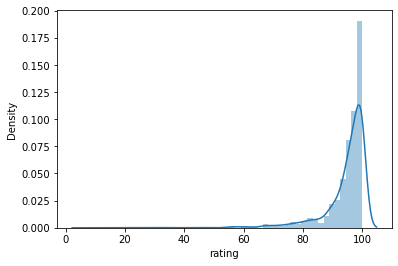

In [105]:
sns.distplot(df1['rating'])

In [106]:
df1['rating'].describe()

count    2659.000000
mean       94.643475
std         7.852813
min         7.000000
25%        93.000000
50%        97.000000
75%       100.000000
max       100.000000
Name: rating, dtype: float64

In [107]:
#since the graph is distorted,we should use median to fill the null values.
df1['rating'].fillna('97',inplace=True)

In [108]:
df1.head()

,Qualification,Profile,Miscellaneous_Info,Fees,experience,locality,city,rating
0,"BHMS, MD - Homeopathy",5,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Kakkanad,Ernakulam,100
1,"BAMS, MD - Ayurveda Medicine",0,"98% 76 Feedback Whitefield, Bangalore",350,12,Whitefield,Bangalore,98
2,"MBBS, MS - Otorhinolaryngology",3,NaN,300,9,Mathikere - BEL,Bangalore,97
3,"BSc - Zoology, BAMS",0,"Bannerghatta Road, Bangalore ?250 Available on...",250,12,Bannerghatta Road,Bangalore,97
4,BAMS,0,"100% 4 Feedback Keelkattalai, Chennai",250,20,Keelkattalai,Chennai,100


In [109]:
df1['Qualification_count'] = df1['Qualification'].apply(lambda x: len(x.split(",")))
df1['Qualification_count'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

In [111]:
#df1['Qualification'].value_counts()

In [112]:
df1["Qualification"]=df1["Qualification"].str.split(",")
Qualification ={}
for x in df1["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [113]:
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [114]:
for qual in final_qual:
    df1[qual] = 0

for x,y in zip(df1['Qualification'].values, np.array([i for i in range(len(df1))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df1[c][y] = 1

In [115]:
df1.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [116]:
df1.head()

,Profile,Miscellaneous_Info,Fees,experience,locality,city,rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,5,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Kakkanad,Ernakulam,100,0,0,0,1,0,0,0,0,0,1
1,0,"98% 76 Feedback Whitefield, Bangalore",350,12,Whitefield,Bangalore,98,0,0,1,0,0,0,0,0,0,0
2,3,NaN,300,9,Mathikere - BEL,Bangalore,97,1,0,0,0,0,0,0,0,0,0
3,0,"Bannerghatta Road, Bangalore ?250 Available on...",250,12,Bannerghatta Road,Bangalore,97,0,0,1,0,0,0,0,0,0,0
4,0,"100% 4 Feedback Keelkattalai, Chennai",250,20,Keelkattalai,Chennai,100,0,0,1,0,0,0,0,0,0,0


In [117]:
df1.drop('Miscellaneous_Info',axis=1,inplace=True)

In [118]:
df1.head()

,Profile,Fees,experience,locality,city,rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,5,100,24,Kakkanad,Ernakulam,100,0,0,0,1,0,0,0,0,0,1
1,0,350,12,Whitefield,Bangalore,98,0,0,1,0,0,0,0,0,0,0
2,3,300,9,Mathikere - BEL,Bangalore,97,1,0,0,0,0,0,0,0,0,0
3,0,250,12,Bannerghatta Road,Bangalore,97,0,0,1,0,0,0,0,0,0,0
4,0,250,20,Keelkattalai,Chennai,100,0,0,1,0,0,0,0,0,0,0


In [120]:
df1.isnull().sum()

Profile                                 0
Fees                                    0
experience                              0
locality                                0
city                                    1
rating                                  0
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
dtype: int64

# Label Encoding

In [123]:
le.fit(df1['locality'])
label_locality=dict(zip(range(len(le.classes_)),le.classes_))

In [127]:
df1['city'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
 Sector 5                 1
Name: city, dtype: int64

In [134]:
df1['locality']=le.fit_transform(df1['locality'])

In [152]:
df1['city'].replace([' Sector 5'],['sector'],inplace=True)

In [155]:
df2=df1.dropna()

In [156]:
df2.shape

(5960, 16)

In [157]:
df1.shape

(5961, 16)

In [162]:
City=[]
for i in range(0,5961):
    City.append(str(df1['city'][i]))

In [164]:
df1['City']=City

In [167]:
df1.drop('city',axis=1,inplace=True)

In [168]:
df1=df1.dropna()

In [169]:
df1.shape

(5961, 16)

In [170]:
le.fit(df1['City'])
label_City=dict(zip(range(len(le.classes_)),le.classes_))

In [171]:
df1['City']=le.fit_transform(df1['City'])

In [172]:
df1.head()

,Profile,Fees,experience,locality,rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
0,5,100,24,296,100,0,0,0,1,0,0,0,0,0,1,4
1,0,350,12,856,98,0,0,1,0,0,0,0,0,0,0,0
2,3,300,9,452,97,1,0,0,0,0,0,0,0,0,0,0
3,0,250,12,68,97,0,0,1,0,0,0,0,0,0,0,0
4,0,250,20,335,100,0,0,1,0,0,0,0,0,0,0,1


In [173]:
df1.isnull().sum()

Profile                                 0
Fees                                    0
experience                              0
locality                                0
rating                                  0
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
City                                    0
dtype: int64

# EDA

**Column 1: Profile**

<AxesSubplot:>

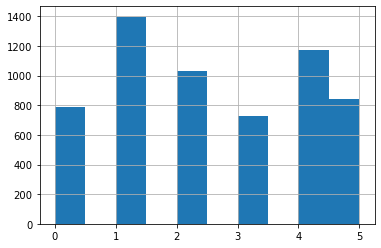

In [175]:
df1['Profile'].hist(grid=True)

In [182]:
labels1=[]
for i in range(0,6):
    labels1.append(label_Profile[i])

In [181]:
df1['Profile'].value_counts()

1    1397
4    1173
2    1034
5     843
0     786
3     728
Name: Profile, dtype: int64

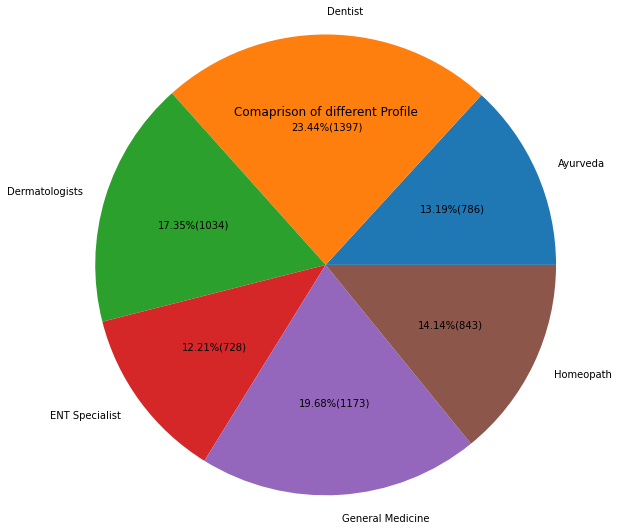

In [183]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=labels1
value=[786,1397,1034,728,1173,843]
ax.pie(value,labels=langs,radius=2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison of different Profile')
plt.show()

Observations:
    
    1.We can see that 23.44% are dentist,followed by general medicine of 19.68%.

<AxesSubplot:xlabel='Fees', ylabel='Density'>

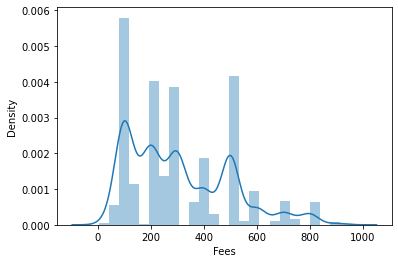

In [184]:
sns.distplot(df1['Fees'])

Observations:
    
    1.We can see that most of the fees belongs to the category 0 to 150.

<AxesSubplot:xlabel='experience', ylabel='Density'>

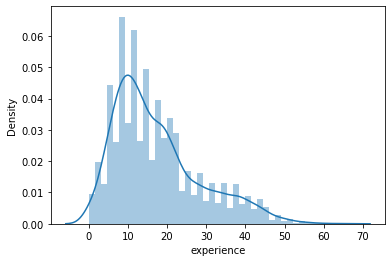

In [189]:
sns.distplot(df1['experience'])

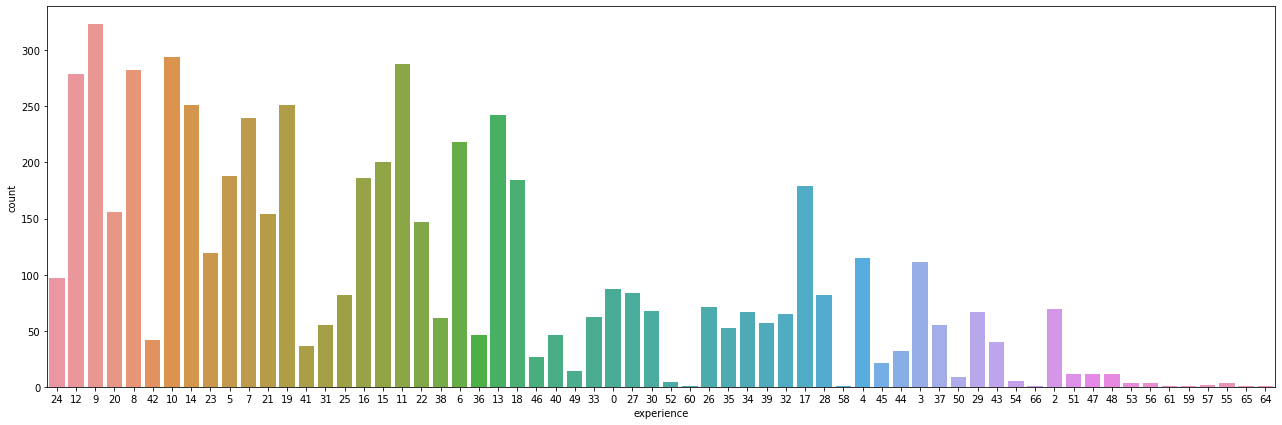

In [194]:
plt.figure(figsize=(22,7))
sns.countplot(df1['experience'])
plt.show()

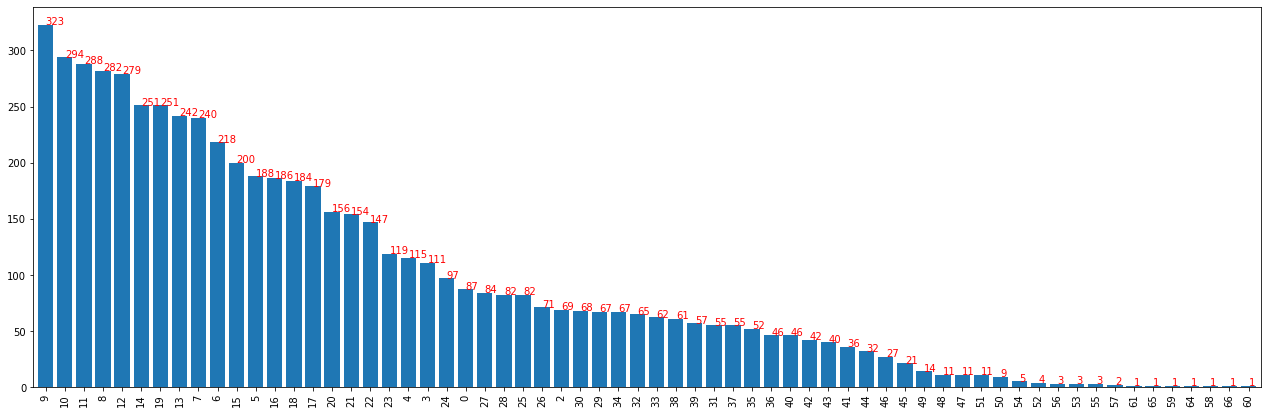

In [198]:
s = df1['experience'].value_counts()
plt.figure(figsize=(22,7))
ax=s.plot.bar(width=.8)
for i, v in s.reset_index().iterrows():
    ax.text(i, v.experience + 0.2 , v.experience, color='red')
plt.show()

Observations:
    
    1.We can see that the doctors who have got 9 years of experience are in most numbers followed by 10 years,11years and 8 years.

<AxesSubplot:xlabel='locality', ylabel='Density'>

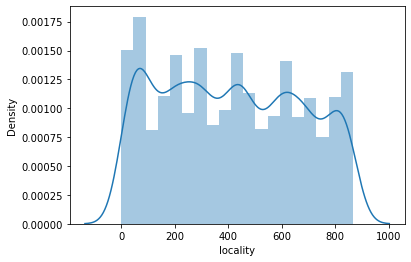

In [200]:
sns.distplot(df1['locality'])

Observations:
    
    1.We ca see that almost all localities equally distributed in the data.

<AxesSubplot:xlabel='rating', ylabel='Density'>

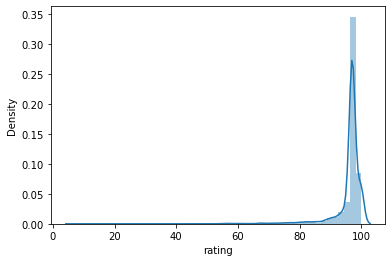

In [201]:
sns.distplot(df1['rating'])

Observations:
    
    1.Most of the ratings are from 85 to 100.

In [203]:
df1['MBBS'].value_counts()

0    3156
1    2805
Name: MBBS, dtype: int64

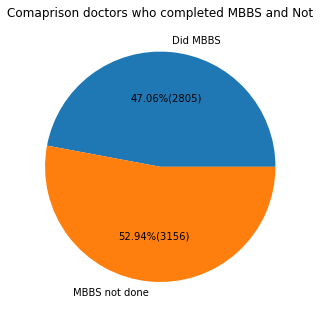

In [209]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Did MBBS','MBBS not done']
value=[2805,3156]
ax.pie(value,labels=langs,radius=1,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison doctors who completed MBBS and Not')
plt.show()

Observations:
    
    1.47.06% of the doctors have did MBBS

In [210]:
df1['BDS'].value_counts()

0    4599
1    1362
Name: BDS, dtype: int64

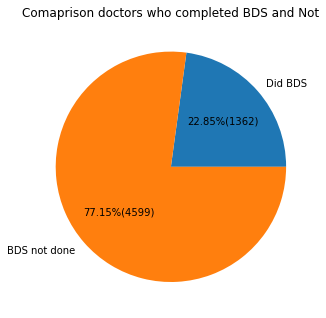

In [211]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Did BDS','BDS not done']
value=[1362,4599]
ax.pie(value,labels=langs,radius=1,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison doctors who completed BDS and Not')
plt.show()

Observations:
    
    1.22.85% of the doctors did BDS.

In [212]:
df1['BAMS'].value_counts()

0    5199
1     762
Name: BAMS, dtype: int64

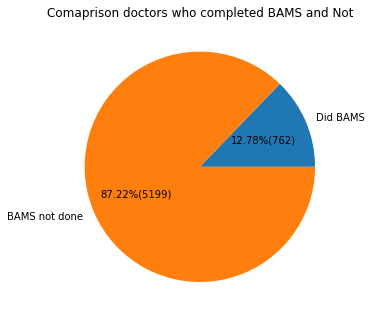

In [213]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Did BAMS','BAMS not done']
value=[762,5199]
ax.pie(value,labels=langs,radius=1,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison doctors who completed BAMS and Not')
plt.show()

Observations:
    
    1.We can see that only 12.78% of the doctors did BAMS.

In [215]:
df1['MD - Dermatology'].value_counts()

0    5356
1     605
Name: MD - Dermatology, dtype: int64

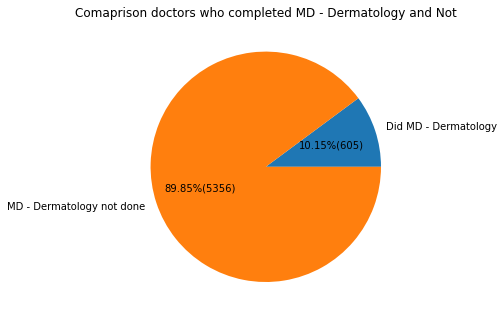

In [216]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Did MD - Dermatology','MD - Dermatology not done']
value=[605,5356]
ax.pie(value,labels=langs,radius=1,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison doctors who completed MD - Dermatology and Not')
plt.show()

Observations:
    
    1.We can see that 10.15% of those doctors did MD in dermatology

In [217]:
df1['MS - ENT'].value_counts()

0    5550
1     411
Name: MS - ENT, dtype: int64

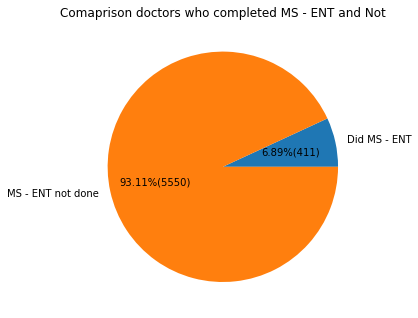

In [218]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Did MS - ENT','MS - ENT not done']
value=[411,5550]
ax.pie(value,labels=langs,radius=1,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison doctors who completed MS - ENT and Not')
plt.show()

Observations:
    
    1.We can see that 6.89% of the doctors have did MS-ENT

In [219]:
df1['Venereology & Leprosy'].value_counts()

0    5668
1     293
Name: Venereology & Leprosy, dtype: int64

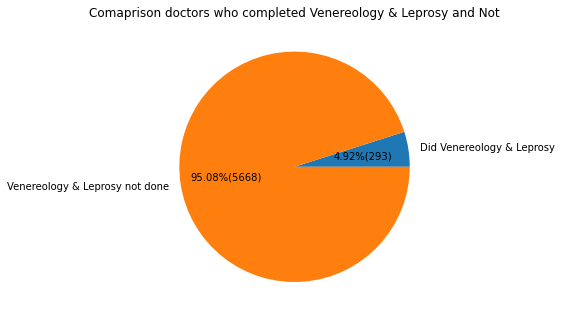

In [220]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Did Venereology & Leprosy','Venereology & Leprosy not done']
value=[293,5668]
ax.pie(value,labels=langs,radius=1,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison doctors who completed Venereology & Leprosy and Not')
plt.show()

Observations:
    
    1.Only 4.92% of the doctors have did venereology and leprosy.

In [221]:
df1['MD - General Medicine'].value_counts()

0    5676
1     285
Name: MD - General Medicine, dtype: int64

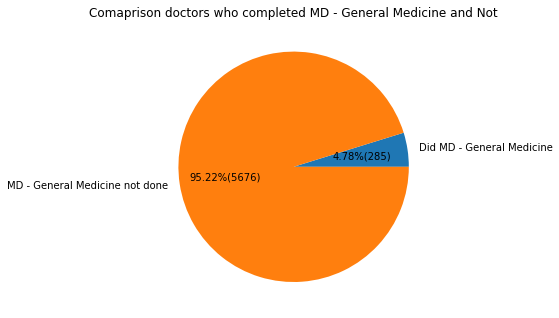

In [222]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Did MD - General Medicine','MD - General Medicine not done']
value=[285,5676]
ax.pie(value,labels=langs,radius=1,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison doctors who completed MD - General Medicine and Not')
plt.show()

Observations:
    
    1.We can see that 4.78% of the doctors have did MD - General Medicine.

In [223]:
df1['City'].value_counts()

0     1258
6     1219
3     1184
5      951
1      855
2      228
4      153
7       86
8       25
10       1
9        1
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='count'>

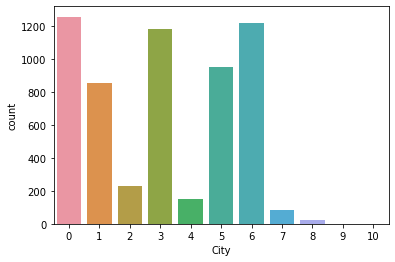

In [224]:
sns.countplot(df1['City'])

In [225]:
label_City[0]

' Bangalore'

In [226]:
label_City[6]

' Mumbai'

Observations:
    
    1.It says that most of the data is from bangalore and Mumbai.

# Multivariate Analysis

In [227]:
from heatmap import heatmap,corrplot

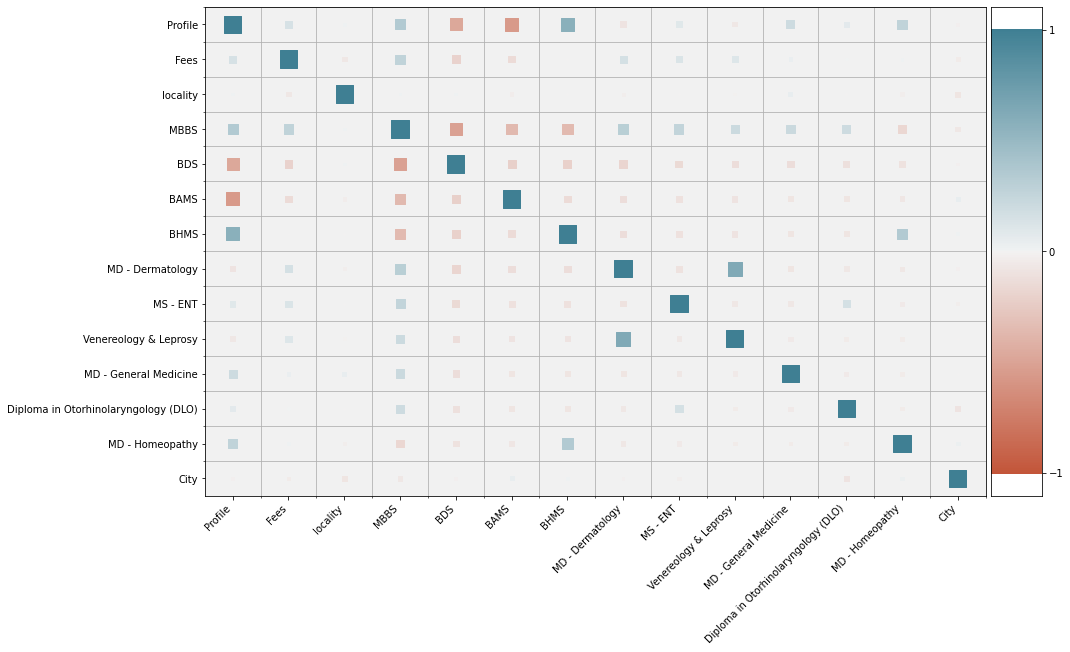

In [230]:
plt.figure(figsize=(15,9))
corrplot(df1.corr(),size_scale=300)
plt.show()

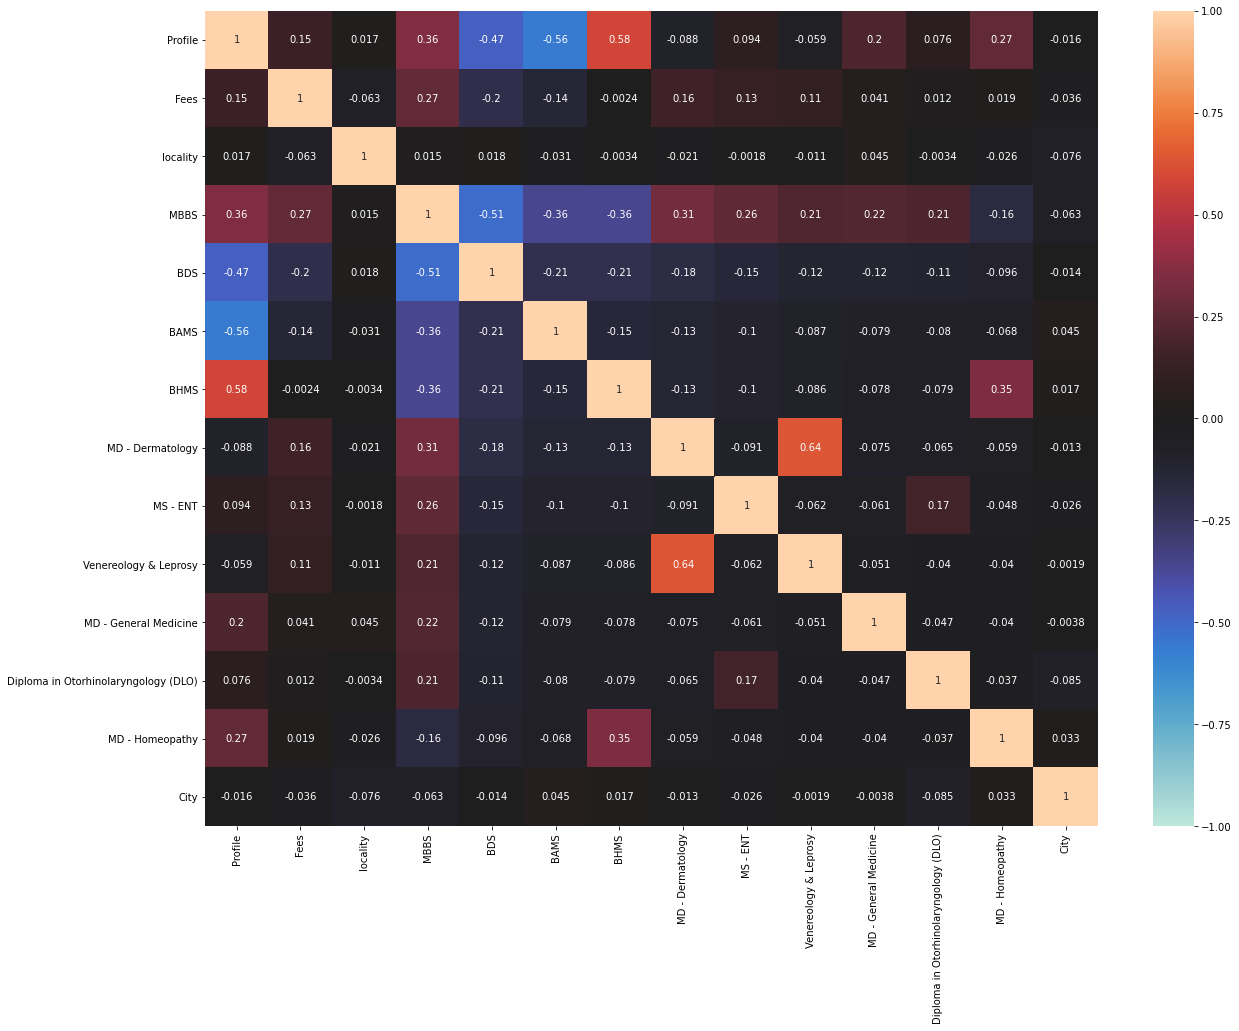

In [231]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:
    
    From the above observations we can see that there are independent variables which are significantly correlated with the response variable fees,
    1.MBBS
    2.BDS
    3.BAMS
    4.locality

# Bi variate analysis

In [232]:
mbbs=df1.groupby('MBBS')

In [233]:
mbbs_1=mbbs.get_group(1)
mbbs_0=mbbs.get_group(0)

In [234]:
mbbs_1.describe()

,Profile,Fees,locality,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
count,2805.000000,2805.000000,2805.00000,2805.0,2805.000000,2805.000000,2805.000000,2805.000000,2805.00000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000
mean,3.066667,362.828877,416.75615,1.0,0.000357,0.000713,0.000713,0.202139,0.13975,0.098039,0.097683,0.085561,0.000357,2.925134
std,0.875351,204.303100,258.39131,0.0,0.018881,0.026698,0.026698,0.401667,0.34679,0.297421,0.296938,0.279765,0.018881,2.261465
min,0.000000,20.000000,1.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,200.000000,195.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,350.000000,416.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,4.000000,500.000000,628.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,5.000000
max,5.000000,950.000000,865.00000,1.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,8.000000


In [235]:
mbbs_0.describe()

,Profile,Fees,locality,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
count,3156.000000,3156.000000,3156.000000,3156.0,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000
mean,1.886565,259.164449,408.887516,0.0,0.431242,0.240811,0.236375,0.012041,0.006020,0.005703,0.003485,0.002852,0.057034,3.219265
std,1.963808,163.410622,254.294750,0.0,0.495328,0.427644,0.424923,0.109084,0.077369,0.075317,0.058944,0.053334,0.231945,2.353557
min,0.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,100.000000,194.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,200.000000,398.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,5.000000,300.000000,621.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,5.000000,920.000000,866.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


No handles with labels found to put in legend.


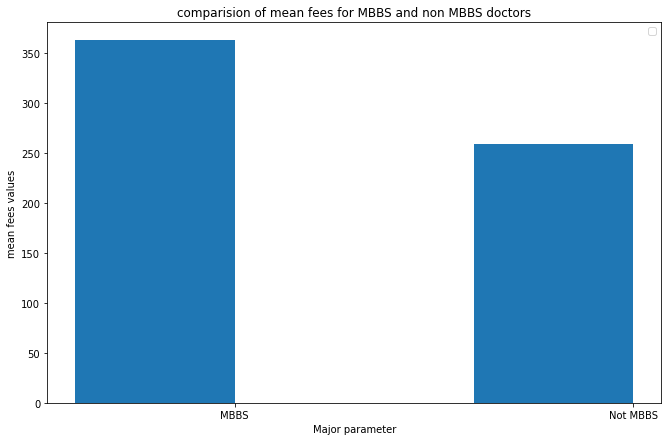

In [240]:

X =['MBBS','Not MBBS']
yp = [363,259]
plt.figure(figsize=(11,7))  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, yp, 0.4,)
  
plt.xticks(X_axis, X)
plt.xlabel("Major parameter")
plt.ylabel("mean fees values")
plt.title("comparision of mean fees for MBBS and non MBBS doctors")
plt.legend()
plt.show()

Observations:
    
    1.We can see that MBBS doctors get much higher fees compared to non MBBS doctors.

In [241]:
bds=df1.groupby('BDS')
bds_1=bds.get_group(1)
bds_0=bds.get_group(0)

In [242]:
bds_1.describe()

,Profile,Fees,locality,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
count,1362.0,1362.000000,1362.000000,1362.000000,1362.0,1362.0,1362.0,1362.0,1362.0,1362.0,1362.0,1362.0,1362.0,1362.000000
mean,1.0,238.263583,420.871512,0.000734,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.019824
std,0.0,142.143811,254.645486,0.027096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.227750
min,1.0,5.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,1.0,100.000000,199.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
50%,1.0,200.000000,419.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000
75%,1.0,300.000000,630.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000
max,1.0,900.000000,866.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000


In [243]:
bds_0.describe()

,Profile,Fees,locality,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.0,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,2.868885,328.580778,410.137639,0.609698,0.0,0.165688,0.162644,0.131550,0.089367,0.063710,0.061970,0.054142,0.039356,3.098935
std,1.662859,198.501938,256.685499,0.487871,0.0,0.371841,0.369081,0.338038,0.285304,0.244261,0.241127,0.226323,0.194463,2.340333
min,0.000000,10.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,150.000000,192.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,300.000000,404.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,4.000000,500.000000,626.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,5.000000,950.000000,865.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


No handles with labels found to put in legend.


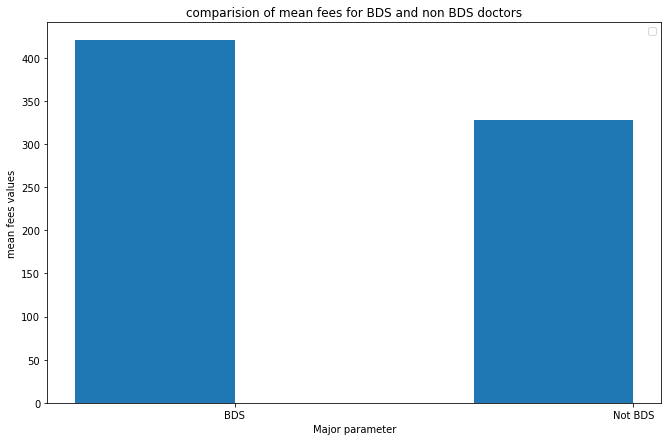

In [244]:
X =['BDS','Not BDS']
yp = [420,328]
plt.figure(figsize=(11,7))  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, yp, 0.4,)
  
plt.xticks(X_axis, X)
plt.xlabel("Major parameter")
plt.ylabel("mean fees values")
plt.title("comparision of mean fees for BDS and non BDS doctors")
plt.legend()
plt.show()

Observations:
    
    1.We can see that those doctors who have completed BDS has higher fees than others.

In [245]:
bams=df1.groupby('BAMS')
bams_1=bams.get_group(1)
bams_0=bams.get_group(0)

In [246]:
bams_1.describe()

,Profile,Fees,locality,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
count,762.000000,762.000000,762.000000,762.000000,762.0,762.0,762.0,762.0,762.0,762.0,762.000000,762.0,762.0,762.000000
mean,0.017060,238.187664,391.665354,0.002625,0.0,1.0,0.0,0.0,0.0,0.0,0.003937,0.0,0.0,3.351706
std,0.273148,155.308088,258.209156,0.051198,0.0,0.0,0.0,0.0,0.0,0.0,0.062663,0.0,0.0,2.523410
min,0.000000,10.000000,1.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,0.000000,100.000000,181.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
50%,0.000000,200.000000,338.500000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.000000
75%,0.000000,300.000000,621.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,6.000000
max,5.000000,900.000000,864.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,7.000000


In [247]:
bams_0.describe()

,Profile,Fees,locality,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
count,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.0,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000
mean,2.797269,318.168686,415.657049,0.539142,0.261973,0.0,0.143874,0.116369,0.079054,0.056357,0.054241,0.047894,0.034814,3.041162
std,1.467247,193.506731,255.830344,0.498513,0.439751,0.0,0.350996,0.320697,0.269848,0.230632,0.226515,0.213562,0.183327,2.280587
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,150.000000,197.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,300.000000,417.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,4.000000,500.000000,626.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,5.000000,950.000000,866.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


Observations:
    
    1.Those who have completed BAMS have significantly less fees.

# Preparing the testing data

In [248]:
df_1.shape

(1987, 6)

In [249]:
df_1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [250]:
df_1.drop('Miscellaneous_Info',axis=1,inplace=True)

In [254]:
expt=[]
for i in range(0,1987):
    k=df_1['Experience'][i][0:].split()
    expt.append(k[0])
df_1['experience']=expt

In [255]:
df_1.drop('Experience',axis=1,inplace=True)

In [257]:
df_1['Profile']=le.fit_transform(df_1['Profile'])

In [258]:
df_1.Place.fillna('Unknown,Unknown',inplace=True)

df_1['locality'] = df_1['Place'].str.split(",").str[0]
df_1['city'] = df_1['Place'].str.split(",").str[1]

In [260]:
df_1.drop('Place',axis=1,inplace=True)

In [265]:
df_1['Rating'].fillna('11%',inplace=True)

In [266]:
ratingt=[]
for i in range(0,1987):
    k=df_1['Rating'][i].split('%')
    ratingt.append(k[0])

In [268]:
df_1['rating']=ratingt

In [269]:
df_1.drop('Rating',axis=1,inplace=True)

In [270]:
df_1.head()

,Qualification,Profile,experience,locality,city,rating
0,MBBS,4,35,Ghatkopar East,Mumbai,11
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",3,31,West Marredpally,Hyderabad,11
2,"MBBS, DDVL",2,40,KK Nagar,Chennai,70
3,BAMS,0,0,New Ashok Nagar,Delhi,11
4,"BDS, MDS - Conservative Dentistry & Endodontics",1,16,Kanakpura Road,Bangalore,100


In [271]:
df_1['Qualification_count'] = df_1['Qualification'].apply(lambda x: len(x.split(",")))
df_1['Qualification_count'].value_counts()

2     889
1     609
3     366
4      87
5      28
6       5
17      1
9       1
7       1
Name: Qualification_count, dtype: int64

In [272]:
df_1["Qualification"]=df_1["Qualification"].str.split(",")
Qualification ={}
for x in df_1["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [273]:
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [274]:
for qual in final_qual:
    df_1[qual] = 0

for x,y in zip(df_1['Qualification'].values, np.array([i for i in range(len(df_1))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df_1[c][y] = 1

In [275]:
df_1.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [276]:
df_1.head()

,Profile,experience,locality,city,rating,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,4,35,Ghatkopar East,Mumbai,11,1,0,0,0,0,0,0,0,0,0
1,3,31,West Marredpally,Hyderabad,11,1,0,0,0,0,0,0,0,1,0
2,2,40,KK Nagar,Chennai,70,1,0,0,0,0,0,0,0,0,1
3,0,0,New Ashok Nagar,Delhi,11,0,0,0,1,0,0,0,0,0,0
4,1,16,Kanakpura Road,Bangalore,100,0,1,0,0,0,0,0,0,0,0


In [279]:
Cityt=[]
for i in range(0,1987):
    Cityt.append(str(df_1['city'][i]))

In [281]:
df_1['City']=Cityt

In [282]:
df_1.drop('city',axis=1,inplace=True)

In [283]:
df_1.head()

,Profile,experience,locality,rating,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL,City
0,4,35,Ghatkopar East,11,1,0,0,0,0,0,0,0,0,0,Mumbai
1,3,31,West Marredpally,11,1,0,0,0,0,0,0,0,1,0,Hyderabad
2,2,40,KK Nagar,70,1,0,0,0,0,0,0,0,0,1,Chennai
3,0,0,New Ashok Nagar,11,0,0,0,1,0,0,0,0,0,0,Delhi
4,1,16,Kanakpura Road,100,0,1,0,0,0,0,0,0,0,0,Bangalore


In [284]:
df_1['locality']=le.fit_transform(df_1['locality'])

In [285]:
df_1['City']=le.fit_transform(df_1['City'])

In [286]:
df_1.head()

,Profile,experience,locality,rating,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL,City
0,4,35,142,11,1,0,0,0,0,0,0,0,0,0,6
1,3,31,578,11,1,0,0,0,0,0,0,0,1,0,5
2,2,40,212,70,1,0,0,0,0,0,0,0,0,1,1
3,0,0,373,11,0,0,0,1,0,0,0,0,0,0,3
4,1,16,231,100,0,1,0,0,0,0,0,0,0,0,0


In [287]:
df1.head()

,Profile,Fees,experience,locality,rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City
0,5,100,24,296,100,0,0,0,1,0,0,0,0,0,1,4
1,0,350,12,856,98,0,0,1,0,0,0,0,0,0,0,0
2,3,300,9,452,97,1,0,0,0,0,0,0,0,0,0,0
3,0,250,12,68,97,0,0,1,0,0,0,0,0,0,0,0
4,0,250,20,335,100,0,0,1,0,0,0,0,0,0,0,1


# Data cleaning

In [288]:
df1.isnull().sum()

Profile                                 0
Fees                                    0
experience                              0
locality                                0
rating                                  0
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
City                                    0
dtype: int64

In [289]:
df_1.isnull().sum()

Profile                                 0
experience                              0
locality                                0
rating                                  0
MBBS                                    0
BDS                                     0
BHMS                                    0
BAMS                                    0
MD - Dermatology                        0
MS - ENT                                0
MD - General Medicine                   0
Venereology & Leprosy                   0
Diploma in Otorhinolaryngology (DLO)    0
DDVL                                    0
City                                    0
dtype: int64

In [290]:
k=df1.applymap(np.isreal)

In [291]:
for col in k:
    print(col)
    print(k[col].value_counts())
    print('\n')

Profile
True    5961
Name: Profile, dtype: int64


Fees
True    5961
Name: Fees, dtype: int64


experience
False    5961
Name: experience, dtype: int64


locality
True    5961
Name: locality, dtype: int64


rating
False    3302
True     2659
Name: rating, dtype: int64


MBBS
True    5961
Name: MBBS, dtype: int64


BDS
True    5961
Name: BDS, dtype: int64


BAMS
True    5961
Name: BAMS, dtype: int64


BHMS
True    5961
Name: BHMS, dtype: int64


MD - Dermatology
True    5961
Name: MD - Dermatology, dtype: int64


MS - ENT
True    5961
Name: MS - ENT, dtype: int64


Venereology & Leprosy
True    5961
Name: Venereology & Leprosy, dtype: int64


MD - General Medicine
True    5961
Name: MD - General Medicine, dtype: int64


Diploma in Otorhinolaryngology (DLO)
True    5961
Name: Diploma in Otorhinolaryngology (DLO), dtype: int64


MD - Homeopathy
True    5961
Name: MD - Homeopathy, dtype: int64


City
True    5961
Name: City, dtype: int64




In [295]:
expert=[]
for i in range(0,1987):
    expert.append(int(df_1['experience'][i]))

In [297]:
df_1['Experience']=expert

In [299]:
df_1.drop('experience',axis=1,inplace=True)

In [302]:
Rate=[]
for i in range(0,1987):
    Rate.append(int(df_1['rating'][i]))

In [303]:
df_1['Ratings']=Rate

In [304]:
df_1.drop('rating',axis=1,inplace=True)

In [305]:
k1=df_1.applymap(np.isreal)
for col in k1:
    print(col)
    print(k1[col].value_counts())
    print('\n')

Profile
True    1987
Name: Profile, dtype: int64


locality
True    1987
Name: locality, dtype: int64


MBBS
True    1987
Name: MBBS, dtype: int64


BDS
True    1987
Name: BDS, dtype: int64


BHMS
True    1987
Name: BHMS, dtype: int64


BAMS
True    1987
Name: BAMS, dtype: int64


MD - Dermatology
True    1987
Name: MD - Dermatology, dtype: int64


MS - ENT
True    1987
Name: MS - ENT, dtype: int64


MD - General Medicine
True    1987
Name: MD - General Medicine, dtype: int64


Venereology & Leprosy
True    1987
Name: Venereology & Leprosy, dtype: int64


Diploma in Otorhinolaryngology (DLO)
True    1987
Name: Diploma in Otorhinolaryngology (DLO), dtype: int64


DDVL
True    1987
Name: DDVL, dtype: int64


City
True    1987
Name: City, dtype: int64


Experience
True    1987
Name: Experience, dtype: int64


Ratings
True    1987
Name: Ratings, dtype: int64




Observations:
    
    1.The data is clean.

# Removing the outliers

In [306]:
from scipy.stats import zscore

# Removing the outliers by IQR method

In [312]:
q1=df1.quantile(0)
q3=df1.quantile(0.96)
IQR=q3-q1
df2=df1[~((df1 <(q1-1.5*IQR))|(df1 >(q3+1.5*IQR))).any(axis=1)]
print('percentage of loss of data by IQR is :',(df1.shape[0]-df2.shape[0])/df1.shape[0])

percentage of loss of data by IQR is : 0.030364032880389198


Observations:
    
    Since the data loss is less than 7% ,its ok.

# Splitting the variables

In [314]:
x=df2.drop('Fees',axis=1)
y=df2['Fees']

In [315]:
x.shape

(5780, 15)

In [316]:
y.shape

(5780,)

In [318]:
x.skew()

Profile                                 0.145469
experience                              0.994414
locality                                0.106043
rating                                 -5.248510
MBBS                                    0.059557
BDS                                     1.246134
BAMS                                    2.177066
BHMS                                    2.577407
MD - Dermatology                        2.583426
MS - ENT                                3.338502
Venereology & Leprosy                   4.097447
MD - General Medicine                   4.164321
Diploma in Otorhinolaryngology (DLO)    4.502043
MD - Homeopathy                         0.000000
City                                    0.024316
dtype: float64

Observations:
    
    Since most of them are categorical data, no need to treat for skewness.

# Model building

In [323]:
maxAccu=0
ln=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=ln
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.14754694208192654 on random state 153


In [324]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=153)

In [325]:
print('x train shape:',x_train.shape)
print('x test shape',x_test.shape)
print('\n')
print('y train shape:',y_train.shape)
print('y test shape',y_test.shape)

x train shape: (4046, 15)
x test shape (1734, 15)


y train shape: (4046,)
y test shape (1734,)


In [326]:
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.148
RMSE: 181.267
mean absolute error: 145.348


In [327]:
#lasso model
ls=Lasso(alpha=0.00001)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predls)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predls)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predls)),3))

r2 score is : 0.148
RMSE: 181.267
mean absolute error: 145.348


In [329]:
#Ridge model
rd=Ridge(alpha=0.1)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrd)),3))

r2 score is : 0.148
RMSE: 181.268
mean absolute error: 145.35


In [333]:
#ElasticNet model
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
predenr=enr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predenr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predenr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predenr)),3))

r2 score is : 0.148
RMSE: 181.269
mean absolute error: 145.352


In [336]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf)),3))

r2 score is : 0.218
RMSE: 173.566
mean absolute error: 134.177


# Cross validation scores

In [339]:
models=[ln,ls,rd,enr,rf]
for m in models:
    
    score=cross_val_score(m,x,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LinearRegression() score is:
0.114


Lasso(alpha=1e-05) score is:
0.114


Ridge(alpha=0.1) score is:
0.114


ElasticNet(alpha=0.0001) score is:
0.114


RandomForestRegressor() score is:
0.166




**From the above observations we can conclude that RandomForestRegressor is the best model**

# Hyper parameter tuning

In [ ]:
rf=RandomForestRegressor()
grid_param={
    'criterion':['mse','mae'],
    
    'max_depth':[10],
    'max_features':['auto'],
    'min_samples_split':[2],
    'bootstrap':[True,False]
}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='r2',
                  cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

Since i have refreshed it,its running again the result it showed is been induced in rf1

In [342]:
rf1=RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=10,max_features='auto',min_samples_split=2,bootstrap=True)

In [343]:
rf1.fit(x_train, y_train)
predrf1=rf1.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf1)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf1)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf1)),3))

r2 score is : 0.25
RMSE: 169.971
mean absolute error: 132.623


Observations:
    
    1.The maximum accuracy score we got is 0.25

In [344]:
predicted_result=pd.DataFrame()

In [345]:
prediction=rf1.predict(df_1)

In [346]:
predicted_result['Predicted Results']=prediction

In [347]:
predicted_result.to_csv('Doctor.csv')

# Saving the model

In [348]:
import joblib
joblib.dump(rf1,'rf1doctor.obj')

['rf1doctor.obj']